# Video Screenshot Description 

In [9]:
import os
from dotenv import load_dotenv
load_dotenv()

from pymongo.mongo_client import MongoClient
from pymongo.server_api import ServerApi

MONGO_URI = os.getenv("MONGO_URI")
uri = MONGO_URI

# uri = "mongodb://localhost:27017/?retryWrites=true&w=majority&appName=Cluster0"

# Create a new client and connect to the server
client = MongoClient(uri, server_api=ServerApi('1'))

# Send a ping to confirm a successful connection
try:
    client.admin.command('ping')
    print("Pinged your deployment. You successfully connected to MongoDB!")
except Exception as e:
    print(e)

Pinged your deployment. You successfully connected to MongoDB!


In [18]:
client.list_database_names()

['sample_mflix', 'admin', 'local']

In [21]:
client.sample_mflix.list_collection_names()

['users', 'sessions', 'movies', 'comments', 'embedded_movies', 'theaters']

In [23]:
coll = client.sample_mflix.movies.find_one()
coll

{'_id': ObjectId('573a1390f29313caabcd42e8'),
 'plot': 'A group of bandits stage a brazen train hold-up, only to find a determined posse hot on their heels.',
 'genres': ['Short', 'Western'],
 'runtime': 11,
 'cast': ['A.C. Abadie',
  "Gilbert M. 'Broncho Billy' Anderson",
  'George Barnes',
  'Justus D. Barnes'],
 'poster': 'https://m.media-amazon.com/images/M/MV5BMTU3NjE5NzYtYTYyNS00MDVmLWIwYjgtMmYwYWIxZDYyNzU2XkEyXkFqcGdeQXVyNzQzNzQxNzI@._V1_SY1000_SX677_AL_.jpg',
 'title': 'The Great Train Robbery',
 'fullplot': "Among the earliest existing films in American cinema - notable as the first film that presented a narrative story to tell - it depicts a group of cowboy outlaws who hold up a train and rob the passengers. They are then pursued by a Sheriff's posse. Several scenes have color included - all hand tinted.",
 'languages': ['English'],
 'released': datetime.datetime(1903, 12, 1, 0, 0),
 'directors': ['Edwin S. Porter'],
 'rated': 'TV-G',
 'awards': {'wins': 1, 'nominations': 0, 

### Read in and test for TECH videos

In [24]:
# read in the json files
import pandas as pd
#beauty_df_100 = pd.read_csv("output/beauty_df_full_100_final.csv", encoding='utf-8')
tech_df_100 = pd.read_csv("output/tech_df_full_100_final.csv", encoding='utf-8')
#fashion_df_100 = pd.read_csv("output/fashion_df_full_100_final.csv", encoding='utf-8')

Reconstruct the dictionary structure to get the screenshoot collage URLs

In [25]:
import json
import ast

def process_json(json_string):
    try:
        python_dict = ast.literal_eval(json_string) # Safely evaluates to Python dict
        json_string = json.dumps(python_dict) #Converts to proper JSON string
        data = json.loads(json_string)
        return data
    except (ValueError, SyntaxError, json.JSONDecodeError) as e:
        print(f"Error processing JSON: {e}")
        return None

img_dict_tech = {}
for idx, row in tech_df_100.iterrows():
    if pd.notnull(row['merged_screenshot']):
        img_dict_tech[row['video_id']] = process_json(row['merged_screenshot'])
len(img_dict_tech), img_dict_tech.keys()

(100,
 dict_keys(['9HQx5pgUoiY', 'b4x8boB2KdI', 'etP2Th9g2hM', '-StTTWAw214', 'Sc9WByMKTG4', 'hJZ63aCXFFc', '5BhJvMOeQWo', '9PCtfKr5Uw8', 'LRRpyTlsZ-s', 'd2kSQiYrOeQ', '5ee2cMal4oI', 'gKOzx4FHObU', 'SdJvoHrvqlA', 'Q451suhTHp8', 'y2vJuxw8-dI', 'ehjpS8Bnd20', 'VcAxjw3akMU', 'julah2zp4dY', 'Jj4wbjBoz9I', 'sm5a9WjNP3g', 'HnIuy3qI4Sg', 'MU1uEbqodJE', 'L_xZVXlbNOw', 'ZhmBG67nSDM', 'I8hPTEfcZjM', 'hGJKywQs7H4', 'TfvIgdzImt4', '_bvqBiMcf7o', 'UNjOWY21qP4', 'Lw0SQ-xhqek', 'hwRuj5ANres', 'cMc8lpsQcdE', 'D2ezDpeq8_Q', '0PpF_2oJ1c8', 'VT5s_sPimhU', 'S6HJS2Hcl0w', 'FDsHCALztjg', 'q7e3ULmtA3Y', '0Y-hSdqnh_c', '0aLg_a9yrZk', 'l5H9xCYNQEk', 'AAvXJOqcRTs', 'Iz1bubKtYTg', '0vn9T3x4dGg', '5Q6uAP443Ks', 'UmQCBVcw_nA', 'tYZMnLosHHE', 'rSoqE5gbNvM', 'iXVTt1pYTrw', 'anIVewgtbFc', 'MCPvVYQyygI', 'gBoXmtDCZMM', '0N-Faw7f9H8', 'EA5NRyU3p10', 'ryejRyd3fY8', 'iwg_K-crnv4', 'fEapHEKqNA8', 'vuchyiyyOCw', 'bkvsY1pQbwc', 'zslf3n2V3uQ', '4vSU-GQY0ww', 'i9tYGItRg7A', 'ijOYi5GSYHo', 'mxqzBcENw18', 'oOgLihYVI9U', '41E1X8

### Download the screnshot collage

In [28]:
import requests
import os
from io import BytesIO
from PIL import Image

def save_images_from_urls(image_dict, output_dir="images"):
    """
    Downloads images from a list of URLs and saves them locally.

    Args:
        image_urls: A list of image URLs.
        output_dir: The directory to save the images (created if it doesn't exist).
    """

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    for video_id in image_dict:
        image_urls = [img['url'] for img in image_dict[video_id]]
        for i, url in enumerate(image_urls):
            try:
                response = requests.get(url, stream=True)
                response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

                image = Image.open(BytesIO(response.content))
                filename = os.path.join(output_dir, f"{video_id}_{i+1}.jpg")  #Safe filename creation
                image.save(filename)
                print(f"Image {i+1} saved to: {filename}")

            except requests.exceptions.RequestException as e:
                print(f"Error downloading image {i+1} from {url}: {e}")
            except IOError as e:
                print(f"Error saving image {i+1} from {url}: {e}")
            except Exception as e: #Catch any other unexpected error
                print(f"An unexpected error occurred for image {i+1} from {url}: {e}")


# Example Usage (replace with your actual data)
#save_images_from_urls(img_dict_tech)


# LLaVa3 Image to Text model

### Load model from Hugging Face

In [34]:
# # load with pipeline abstraction

# from transformers import pipeline
# from PIL import Image    
# import requests

# model_id = "xtuner/llava-llama-3-8b-v1_1-transformers"
# pipe = pipeline("image-to-text", model=model_id, device=0)



In [6]:
import torch
from transformers import AutoProcessor, LlavaForConditionalGeneration
from PIL import Image
model_id = "xtuner/llava-llama-3-8b-v1_1-transformers"
model = LlavaForConditionalGeneration.from_pretrained(
    model_id, 
    torch_dtype=torch.float16, 
    low_cpu_mem_usage=True, 
).to(0)
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


### Describe the image and construct Visual Privacy Variables

In [32]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)
import glob
import os
image_dir = "images/tech" # the directory storing the images
image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp', '*.tiff', '*.webp'] # common image file extensions
image_paths = []
for ext in image_extensions:
    image_paths.extend(glob.glob(os.path.join(image_dir, ext)))
# Print all image file paths
for path in image_paths:
    print(path)


images/tech\-StTTWAw214_1.jpg
images/tech\-StTTWAw214_10.jpg
images/tech\-StTTWAw214_11.jpg
images/tech\-StTTWAw214_12.jpg
images/tech\-StTTWAw214_13.jpg
images/tech\-StTTWAw214_2.jpg
images/tech\-StTTWAw214_3.jpg
images/tech\-StTTWAw214_4.jpg
images/tech\-StTTWAw214_5.jpg
images/tech\-StTTWAw214_6.jpg
images/tech\-StTTWAw214_7.jpg
images/tech\-StTTWAw214_8.jpg
images/tech\-StTTWAw214_9.jpg
images/tech\-u8xxKK4kmA_1.jpg
images/tech\-u8xxKK4kmA_10.jpg
images/tech\-u8xxKK4kmA_11.jpg
images/tech\-u8xxKK4kmA_12.jpg
images/tech\-u8xxKK4kmA_13.jpg
images/tech\-u8xxKK4kmA_14.jpg
images/tech\-u8xxKK4kmA_15.jpg
images/tech\-u8xxKK4kmA_16.jpg
images/tech\-u8xxKK4kmA_2.jpg
images/tech\-u8xxKK4kmA_3.jpg
images/tech\-u8xxKK4kmA_4.jpg
images/tech\-u8xxKK4kmA_5.jpg
images/tech\-u8xxKK4kmA_6.jpg
images/tech\-u8xxKK4kmA_7.jpg
images/tech\-u8xxKK4kmA_8.jpg
images/tech\-u8xxKK4kmA_9.jpg
images/tech\0aLg_a9yrZk_1.jpg
images/tech\0aLg_a9yrZk_10.jpg
images/tech\0aLg_a9yrZk_11.jpg
images/tech\0aLg_a9yrZk_12.

Test on 1 image

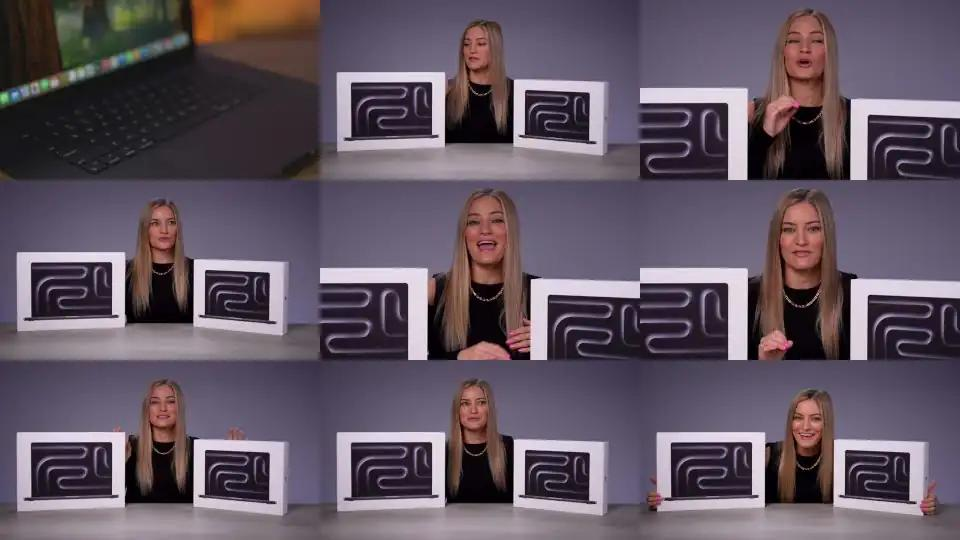

In [33]:
test_image = Image.open(image_paths[0])
test_image

## LLAMA3.2 VISION

In [35]:
from groq import Groq

client = Groq()
completion = client.chat.completions.create(
    model="llama-3.2-11b-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What's in this image?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/f/f2/LPU-v1-die.jpg"
                    }
                }
            ]
        }
    ],
    temperature=1,
    max_completion_tokens=1024,
    top_p=1,
    stream=False,
    stop=None,
)

print(completion.choices[0].message)


ChatCompletionMessage(content='This image is a simulated impression of what a 2,016-bit 74184 binary computer math chip might look like.\n\nA 64 by 32 binary bit adder flip-chip (74184) would enable a 16-bit wide, 32-bit wide, or wider data bus. It\'s normally operated in three main modes: the carry lookahead adder mode (with four input carry bits), the parallel add mode (with a single input carry bit), and the simple incrementor mode.\n\nIn 74184 mode, the 16-bit adder adds two 16-bit binary numbers. In 74185 mode, the 32-bit adder adds two 32-bit binary numbers. It would be easy to enlarge the 74184 math chip another power of two, so each added 16-bit adder or other power of two binary processor 74178-89, or for wider data buses; the digital processor for the 74182-83-84-85-89-88-86-87 would be applied).\n\nWith a little work, you could possibly modify the 74184 to have a 4-bit carry lookahead logic that can accomplish 512-bit wide data bus by just using a couple of NAND or NOR logic

In [41]:
from groq import Groq
import base64


# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Path to your image
image_path = "sf.jpg"

# Getting the base64 string
base64_image = encode_image(image_paths[0])

client = Groq()

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What is the hairstyle and haircolor of the person in the video?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}",
                    },
                },
            ],
        }
    ],
    model="llama-3.2-11b-vision-preview",
)

print(chat_completion.choices[0].message.content) 

The person in the video appears to have long blonde hair, judging by the still images included in the screenshot.


## GEMINI

In [40]:
import httpx
import os
import base64
import PIL.Image
import os
import google.generativeai as genai

model = genai.GenerativeModel(model_name = "gemini-1.5-pro")
image_path = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg/2560px-Palace_of_Westminster_from_the_dome_on_Methodist_Central_Hall.jpg"

image = httpx.get(image_path)

prompt = "Caption this image."
response = model.generate_content([{'mime_type':'image/jpeg', 'data': base64.b64encode(image.content).decode('utf-8')}, prompt])

print(response.text)


c:\Users\giahu\miniconda3\envs\webscrape\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


A view of London, England featuring the Palace of Westminster (Houses of Parliament) and Big Ben, with the London Eye Ferris wheel visible in the distance to the left. The cityscape is filled with a mix of historic and modern buildings, and the sky is cloudy.  Parts of Westminster Abbey are also visible in the lower right.


In [17]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\nThis is a collage from a youtube video screenshot, describe the person and the actions this person is performing?<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=300, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


This is a collage from a youtube video screenshot, describe the person and the actions this person is performing?assistant

The collage from the YouTube video screenshot features a man who is holding a laptop and a keyboard. He is demonstrating the use of the laptop and keyboard, possibly showcasing their features or functionality. The collage consists of multiple images of the man, with the laptop and keyboard being the central focus. The man appears to be engaged in a tutorial or demonstration, providing viewers with information about the laptop and keyboard. unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt unkt


In [29]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\nPlease provide detailed description of the person in this collage\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


Please provide detailed description of the person in this collage
assistant

The collage features a man who appears to be in his mid-30s. He is wearing glasses and a black shirt. He is holding a laptop computer in his hands and is standing in front of a black keyboard. The man is also holding a small device with a blue screen in his hands. The background of the image is dark, with a blurred image of a city skyline visible. The man is standing in front of a black keyboard and a black monitor. The image is taken from a low angle, looking up at the man. The man is standing in front of a black monitor and a black keyboard. The image is taken from a low angle, looking up at the man. The man is standing in front of a black monitor and a black keyboard. The image is taken from a low angle, looking up at the man. The man is standing in front of a black monitor and a black keyboard. The image is taken from a low angle, looking up at the man. The man


In [37]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\nHow much face exposure is this person exerting\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


How much face exposure is this person exerting
assistant

The person in the image is exerting a significant amount of face exposure, as they are shown in multiple close-up shots with their face occupying a large portion of the frame. This is likely done to emphasize the person's facial features and expressions, possibly for a specific purpose such as a video or a photograph. The person is also holding a laptop, which further suggests that they might be engaged in a task or activity that requires their attention and focus.closeclose


In [40]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\nHow much body-related exposure is this person exerting\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


How much body-related exposure is this person exerting
assistant

In the image, the person is showing off a laptop computer to the camera, and there are multiple shots of the laptop and the person. However, there is no body-related exposure in the image. The focus is on the laptop and its features, not on the person's body. laptop


In [7]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\nHow much body-related exposure is this person showing\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.


user


How much body-related exposure is this person showing
assistant

In the image, the person is showing a significant amount of body-related exposure. They are holding up a laptop computer, which is displaying a close-up of their face. This close-up reveals their facial features and expressions, making it a personal and intimate display of their body. Additionally, the person is also holding a cell phone, which is displaying a close-up of their hand. This further emphasizes the body-related exposure, as it showcases their hand and fingers in detail. Overall, the person is exposing a considerable amount of their body through the use of technology, specifically through the display of close-ups of their face and hand on the laptop and cell phone screens. selfie mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror mirror


In [41]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n On the scale of 0 to 4 with 0 being 'no exposure' and 4 being 'high exposure' what level of face, skin and body exposure is this person exerting\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 On the scale of 0 to 4 with 0 being 'no exposure' and 4 being 'high exposure' what level of face, skin and body exposure is this person exerting
assistant

The person in the image is exerting a high level of exposure, as they are holding up a laptop computer and a keyboard in a dark room. This suggests that they are intentionally trying to create a dramatic or artistic effect by highlighting the objects in the low-light environment. The use of a high exposure setting would emphasize the details and textures of the laptop and keyboard, while also creating a visually striking contrast between the objects and the surrounding darkness.


In [44]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n What level of interaction with the reviewed product is this person engaging in?\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 What level of interaction with the reviewed product is this person engaging in?
assistant

The person in the image is engaging in a high level of interaction with the reviewed product, which is a laptop. They are holding the laptop in their hands and actively using it, possibly for tasks such as browsing the internet, watching videos, or working on documents. The image also shows a close-up of the laptop keyboard, indicating that the person is actively typing or using the keyboard for input. This level of interaction suggests that the person is familiar with the laptop and its functions, and is likely using it for personal or professional purposes. Review of the product: The laptop in the image is a Dell laptop, which is a well-known brand in the computer industry. It is known for its range of products, including desktop and portable laptops, as well as monitors, keyboards, and mice. The laptop in the image appears to be a standard-sized laptop, with a full-sized keyboard and a

In [45]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n Describe the location or the background where this person is recorded in?\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 Describe the location or the background where this person is recorded in?
assistant

The person is recorded in a dark room, which appears to be a studio setting. recording studio. laptop computer.


In [46]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n Is there any other people or animals in the collage apart from the main reviewer?\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 Is there any other people or animals in the collage apart from the main reviewer?
assistant

No, the collage only features the main reviewer, who is seen using a laptop and holding a laptop in various positions. There are no other people or animals visible in the images. typing on a laptop MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro MacBook Pro


In [47]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n What is the race or ethnicity of the reviewer in this collage?\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 What is the race or ethnicity of the reviewer in this collage?
assistant

The race or ethnicity of the reviewer in this collage is Asian.Keyboard and mouse on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are on a table.A black keyboard and mouse are


In [51]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n What is the physical attributes such as physical build, skin tone, hair, style of the person in this collage ?\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 What is the physical attributes such as physical build, skin tone, hair, style of the person in this collage?
assistant

The person in the collage is a young man with a dark complexion, short hair, and a beard. He is wearing glasses and a black shirt.Different photos of a man holding a laptop.Collage of photos of a man holding a laptop.


In [52]:
prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n What level of interaction with the reviewed product is this person engaging in?\n<|eot_id|>"
          "<|start_header_id|>assistant<|end_header_id|>\n\n")

inputs = processor(prompt, test_image, return_tensors='pt').to(0, torch.float16)

output = model.generate(**inputs, max_new_tokens=200, do_sample=False)
print(processor.decode(output[0][2:], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


user


 What level of interaction with the reviewed product is this person engaging in?
assistant

The person in the image is engaging in a high level of interaction with the reviewed product, which is a laptop. They are holding the laptop in their hands and actively using it, possibly for tasks such as browsing the internet, watching videos, or working on documents. The image also shows a close-up of the laptop keyboard, indicating that the person is actively typing or using the keyboard for input. This level of interaction suggests that the person is familiar with the laptop and its functions, and is likely using it for personal or professional purposes. Review of the product: The laptop in the image is a Dell laptop, which is a well-known brand in the computer industry. It is known for its range of products, including desktop and portable laptops, as well as monitors, keyboards, and mice. The laptop in the image appears to be a standard-sized laptop, with a full-sized keyboard and a

In [ ]:
# prompt = ("<|start_header_id|>user<|end_header_id|>\n\n<image>\n What level of interaction with the reviewed product is this person engaging in?<|eot_id|>"
#           "<|start_header_id|>assistant<|end_header_id|>\n\n")
# outputs = pipe(test_image, prompt=prompt, generate_kwargs={"max_new_tokens": 300})
# print(outputs)

[{'generated_text': 'user\n\n\n What level of interaction with the reviewed product is this person engaging in?assistant\n\nThe person in the image is engaging in a high level of interaction with the reviewed product, which is a laptop. They are holding the laptop in their hands and actively using it, possibly for tasks such as browsing the internet, watching videos, or working on documents. The image also shows a close-up of the laptop keyboard, indicating that the person is actively typing or using the keyboard for input. This level of interaction suggests that the person is familiar with the laptop and its functions, and is likely using it for personal or professional purposes. demonstration'}]
